https://notebooksharing.space/

In [2]:
import pandas as pd

In [3]:
df1= pd.read_csv("C:/Users/Fishp/software_bootcamp_2021/Thesis/maracoos_codar_sites_2021.txt")
# df1

In [4]:
df1.to_csv('maracoos_codar_sites_2021.csv', 
                  index = None)
# df1

In [5]:
df2 = df1.rename({'%Site#':'Site#',' Site Code':'Site Code',' Longitude':'lon',' Latitude':'lat',
                  ' Frequency':'Frequency',' Look Angle Start':'Look Angle Start',' Look Angle End':'Look Angle End'}, axis=1)

In [6]:
df3= df2.set_index('Site#')
# df3

In [7]:
df2.index

RangeIndex(start=0, stop=49, step=1)

In [8]:
# df3=df2.drop([44,45,46,47,48])
df4=df3.drop([42,44,45,46,47,48,])
df4                                  #df4 has the Puerto Rico Sites removed and Site# as the index

,Site Code,lon,lat,Frequency,Look Angle Start,Look Angle End
Site#,,,,,,
1,NAUS,-69.947200,41.844300,5,10.0,170.0
2,NANT,-69.971900,41.249800,5,50.0,260.0
3,MVCO,-70.526800,41.349800,5,120.0,230.0
4,BLCK,-71.550900,41.152700,5,100.0,240.0
5,AMAG,-72.123900,40.969200,5,90.0,230.0
6,MRCH,-72.745500,40.788700,5,80.0,230.0
7,HEMP,-73.589400,40.587000,5,90.0,200.0
8,HOOK,-73.983800,40.433200,5,80.0,180.0
9,LOVE,-74.117100,39.736200,5,60.0,190.0


In [9]:
# !pip install seaborn

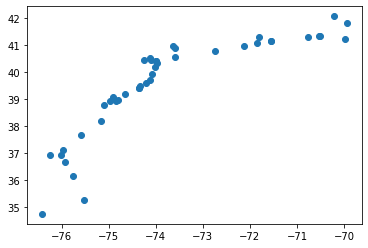

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x=df4['lon'], y=df4['lat'])
plt.show()

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from oceans.ocfis import uv2spdir, spdir2uv
import pandas as pd
import numpy as np
%matplotlib inline
import cmocean as cmo
import cmocean
import seaborn as sns
from metpy.plots import USCOUNTIES 

In [12]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

projection =ccrs.PlateCarree()
projection2=ccrs.Mercator()
# extent = [-77, -69, 38, 41.5]
lon = df4['lon']
lat = df4['lat']
extent = [
    lon.min() - 1,
    lon.max() + 1,
    lat.min() + 0.465,
    lat.max() + 1
]

LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor='white'
)

state_lines = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartop

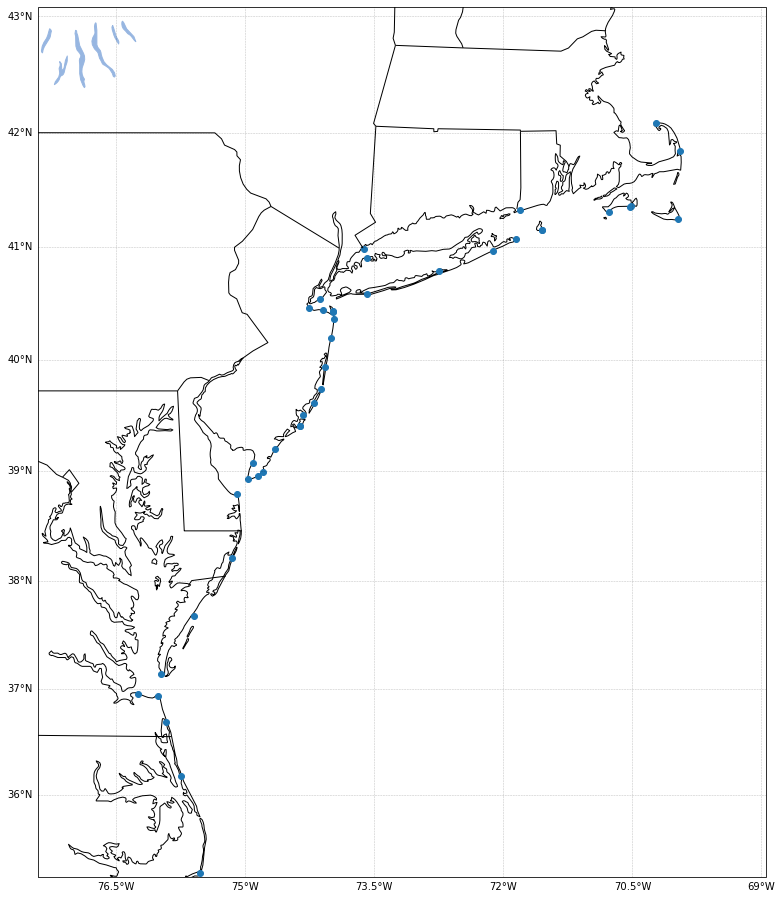

In [13]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection2)
)

# plot arrows over pcolor
h = ax.scatter(x=df4['lon'], y=df4['lat'],transform=ccrs.PlateCarree())


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(state_lines, edgecolor='black')

I NEED BATHYMETRY

In [14]:
dfr=pd.read_csv("C:/Users/Fishp/software_bootcamp_2021/Thesis/MARACOOS_HFR_50percent_boundary.csv")
dfr

,lat,lon
0,36.6234,-75.8734
1,36.5155,-75.8153
2,36.4616,-75.7572
3,36.2998,-75.6991
4,36.0840,-75.6410
...,...,...
218,36.8931,-75.8153
219,36.7852,-75.8734
220,36.7313,-75.8734
221,36.6773,-75.8734


C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


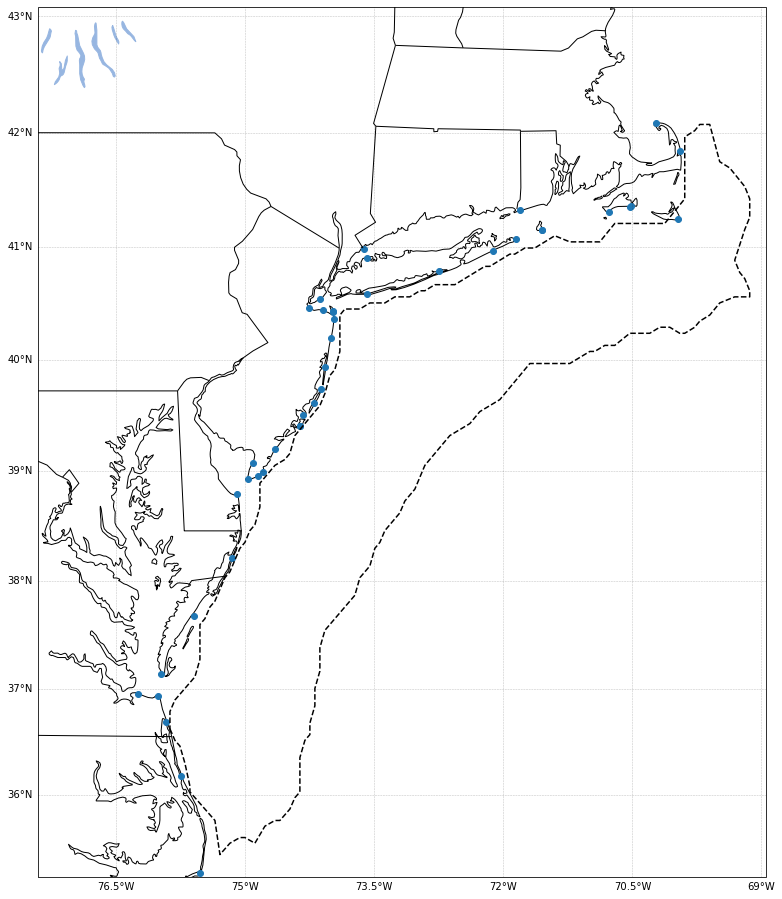

In [15]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection2)
)

h = ax.scatter(x=df4['lon'], y=df4['lat'],transform=ccrs.PlateCarree())
g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='black')


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(state_lines, edgecolor='black')

In [16]:
df4

,Site Code,lon,lat,Frequency,Look Angle Start,Look Angle End
Site#,,,,,,
1,NAUS,-69.947200,41.844300,5,10.0,170.0
2,NANT,-69.971900,41.249800,5,50.0,260.0
3,MVCO,-70.526800,41.349800,5,120.0,230.0
4,BLCK,-71.550900,41.152700,5,100.0,240.0
5,AMAG,-72.123900,40.969200,5,90.0,230.0
6,MRCH,-72.745500,40.788700,5,80.0,230.0
7,HEMP,-73.589400,40.587000,5,90.0,200.0
8,HOOK,-73.983800,40.433200,5,80.0,180.0
9,LOVE,-74.117100,39.736200,5,60.0,190.0


C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


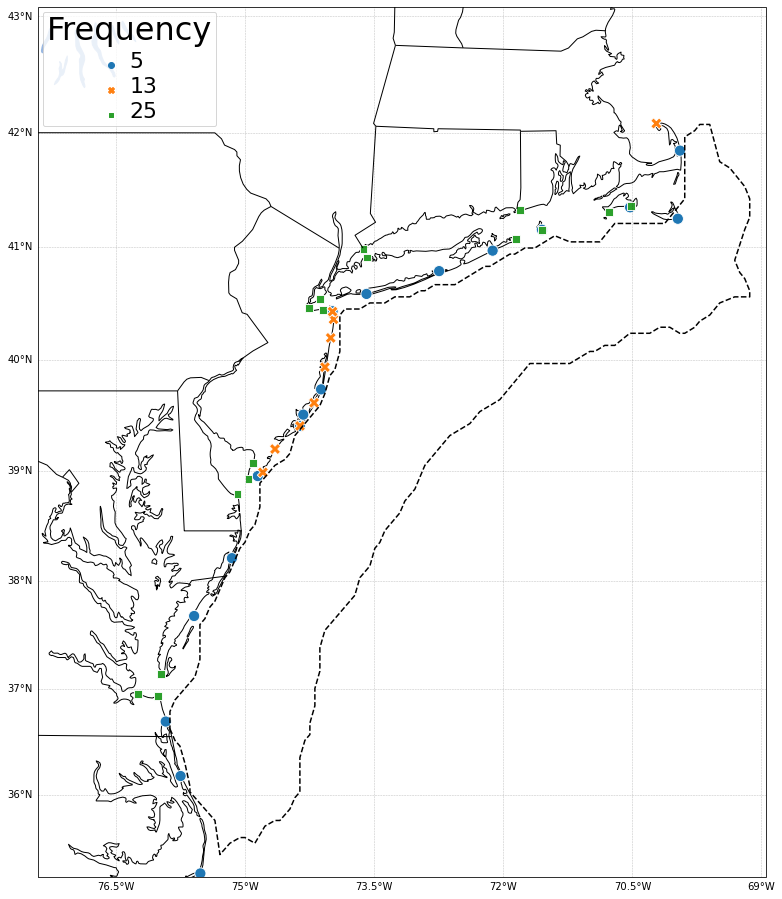

In [17]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection2)
)

h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=125,ax=ax);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='black')


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(state_lines, edgecolor='black')


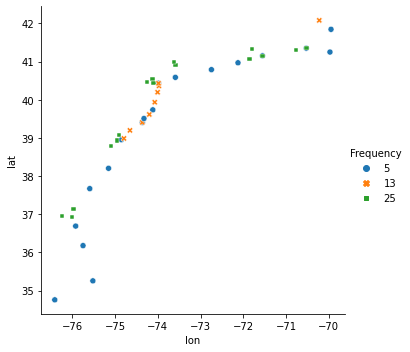

In [18]:
sns.relplot(x=df4['lon'], y=df4['lat'], hue=df4['Frequency'],style=df4['Frequency'], data=df4);

In [20]:
fname = ('C:/Users/Fishp/software_bootcamp_2021/04_cartopy/04_cartopy/data/ETOPO2v2c_f4.nc')
ds_etopo = xr.open_dataset(fname)
# ds_etopo

In [21]:
region = ds_etopo.sel(x=slice(-77, -69), y=slice(35, 43))
# ds=ds.sel(lon=slice(-76,-72))
# ds=ds.sel(lat=slice(38,42))

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


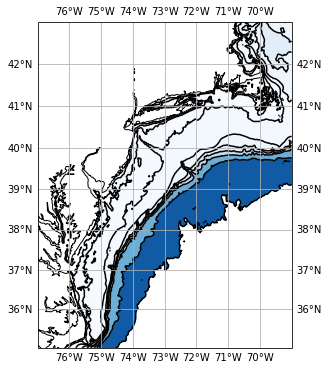

In [23]:

proj = ccrs.Mercator()
data_crs= ccrs.PlateCarree()
lvls = [-3000, -2000, -1000, -500, -200, -100, -50, -25, -15]
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection = proj)
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

plt.contourf(region.x, region.y, region.z, levels=lvls, transform=data_crs, cmap='Blues_r')
plt.contour(region.x, region.y, region.z, levels=lvls, transform=data_crs, colors='k', linestyles='solid')

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecat

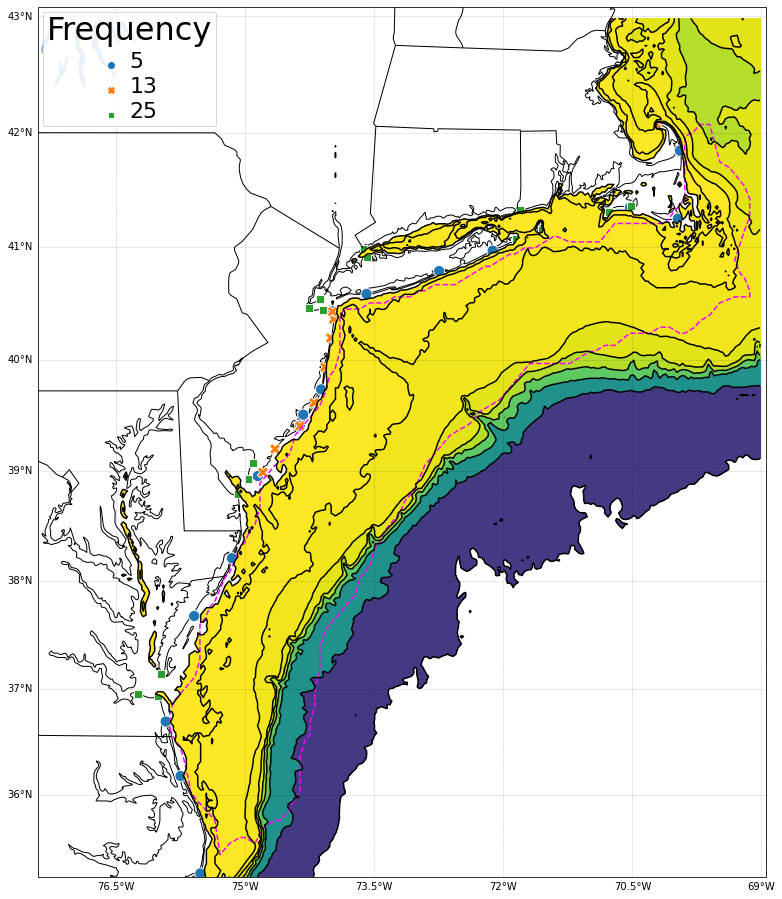

In [24]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection2)
)

h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=125,ax=ax);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='fuchsia')


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(state_lines, edgecolor='black')
plt.contourf(region.x, region.y, region.z, levels=lvls, transform=data_crs)
plt.contour(region.x, region.y, region.z, levels=lvls, transform=data_crs, colors='k', linestyles='solid')

In [25]:
counties = USCOUNTIES.with_scale('5m')
scl = '10m'
borders = cfeature.BORDERS.with_scale(scl)
lakes = cfeature.LAKES.with_scale(scl)
coast = cfeature.COASTLINE.with_scale(scl)
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale=scl,
                                  facecolor='none')

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecat

<a list of 19 text.Text objects>

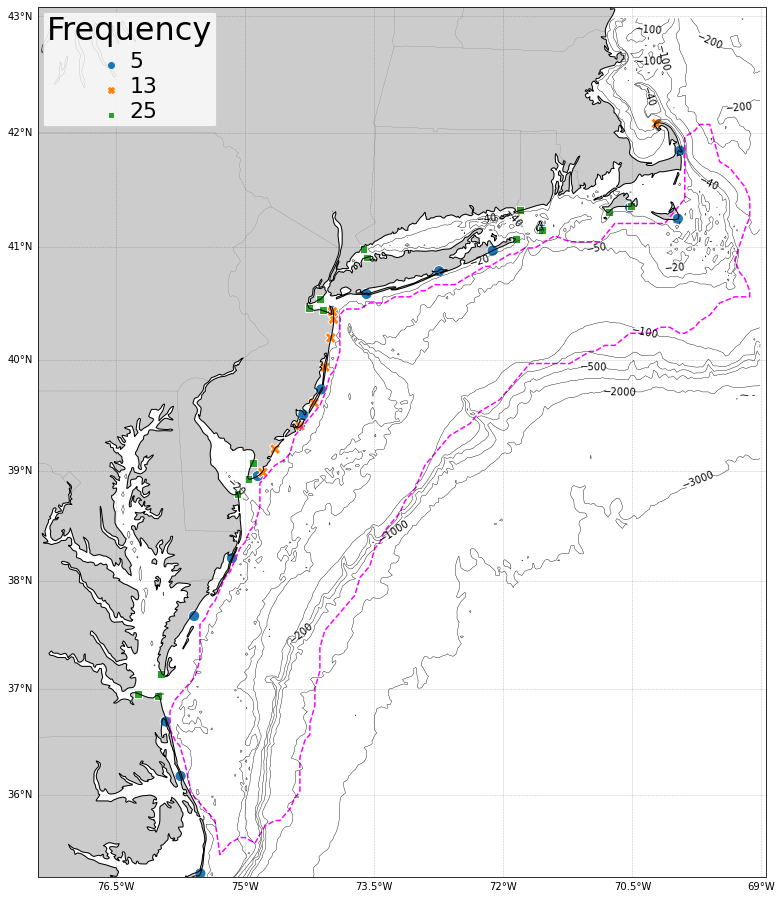

In [26]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection2)
)

h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=125,ax=ax);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='fuchsia')


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(coast, linewidth=1., zorder=5)
ax.add_feature(borders, linewidth=1., zorder=5)
ax.add_feature(lakes, linewidth=0.5, edgecolor='k', facecolor='none', zorder=5)
ax.add_feature(states, linewidth=0.1, edgecolor='k', zorder=5)
# ax.add_feature(counties, edgecolor='gray', facecolor='none', linewidth=0.4, zorder=5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face',facecolor=[0.8, 0.8, 0.8]), zorder=0)
lvls = [-3000, -2000, -1000, -500, -200, -100, -50, -40, -20]
f=ax.contour(region.x, region.y, region.z, levels= lvls, colors='k', linestyles='solid', linewidths=.4,  transform=ccrs.PlateCarree())
plt.clabel(f)


In [31]:
import geopandas as gpd
import os

In [32]:
def boem_shapefiles(boem_rootdir):
    shape_file_lease = os.path.join(boem_rootdir, 'wind_leases/BOEM_wind_leases.shp')
    shape_file_plan = os.path.join(boem_rootdir, 'planning_areas/BOEM_planning_areas.shp')
    leasing_areas = gpd.read_file(shape_file_lease)
    leasing_areas = leasing_areas.to_crs(crs={'init': 'epsg:4326'})
    planning_areas = gpd.read_file(shape_file_plan)
    planning_areas = planning_areas.to_crs(crs={'init': 'epsg:4326'})

    return leasing_areas, planning_areas

In [33]:
[lease_area,plan_area] = boem_shapefiles('C:/Users/Fishp/software_bootcamp_2021/Thesis/wind_energy/BOEM_shp_kmls/shapefiles/')

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [34]:
lease_area.plot(ax=ax, color='none', edgecolor='red', transform = projection)

<GeoAxesSubplot:xlabel='lon', ylabel='lat'>

<Figure size 432x288 with 0 Axes>

In [35]:
lvls = [-3000, -2000, -1000, -500 -200, -100, -50, -40, -20]


C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartop

Text(0.55, 0.06, 'Fig 1. A map of the Mid-Atlantic Bight with bathymetric isolines highlighting HFR station locations. Station Frequency \n is indicated (5 MHz: blue circle, 13 MHz: orange cross, 25 MHz: green square, All Frequencies: red vertical cross) \n. The 50% coverage line of the HFR field is highlighted in dashed majenta')

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


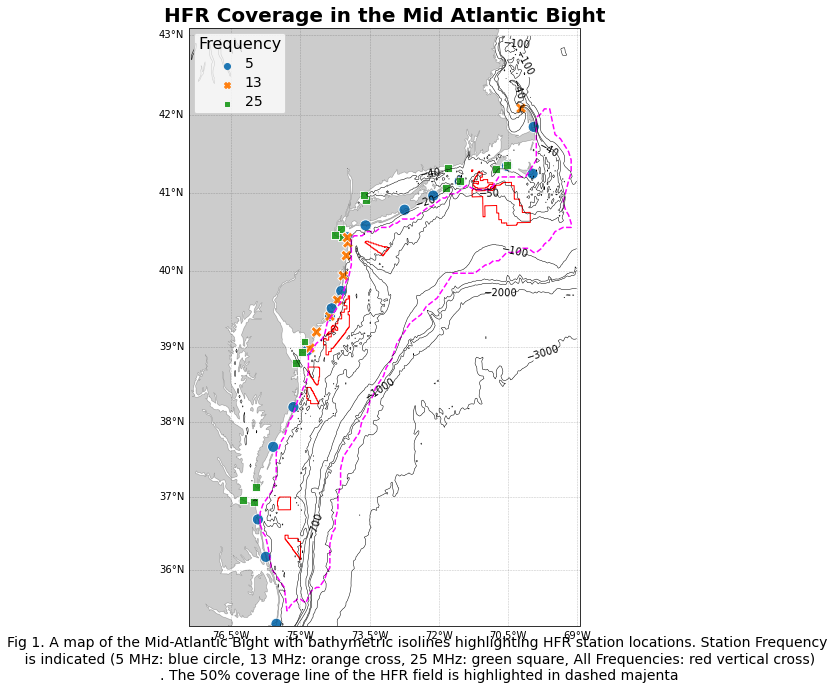

In [36]:
# Initialize blank plot with a mercator projection
lvls = [-3000, -2000, -1000, -500 -200, -100, -50, -40, -20]
fig, ax = plt.subplots(
    figsize=(13, 11),
    subplot_kw=dict(projection=projection2)
)

h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=125,ax=ax);
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title
g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='fuchsia')
f=ax.contour(region.x, region.y, region.z, levels= lvls, colors='k', linestyles='solid', linewidths=.5,  transform=ccrs.PlateCarree())
plt.clabel(f)
k=lease_area.plot(ax=ax, color='none', edgecolor='red', transform = projection)


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(coast, linewidth=0.1, zorder=5)
ax.add_feature(borders, linewidth=1., zorder=5)
ax.add_feature(lakes, linewidth=0.5, edgecolor='k', facecolor='none', zorder=5)
# ax.add_feature(states, linewidth=0.5, edgecolor='k', zorder=5)
# ax.add_feature(counties, edgecolor='gray', facecolor='none', linewidth=0.4, zorder=5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face',facecolor=[0.8, 0.8, 0.8]), zorder=0)
ax.set_title(f'HFR Coverage in the Mid Atlantic Bight', fontsize=20, fontweight='bold')
txt="Fig 1. A map of the Mid-Atlantic Bight with bathymetric isolines highlighting HFR station locations. Station Frequency \n is indicated (5 MHz: blue circle, 13 MHz: orange cross, 25 MHz: green square, All Frequencies: red vertical cross) \n. The 50% coverage line of the HFR field is highlighted in dashed majenta"
plt.figtext(0.55, 0.06, txt, wrap=True, horizontalalignment='center', fontsize=14)

# TO DO
# add a legend for 50% line and eind energy lines, increase font size of tick marks, dcrease size of stations symbols. Remove thr ALL station, Finish caption.
# cut off bottom station and line up bathymetric lines. Play with bathymetry lines

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


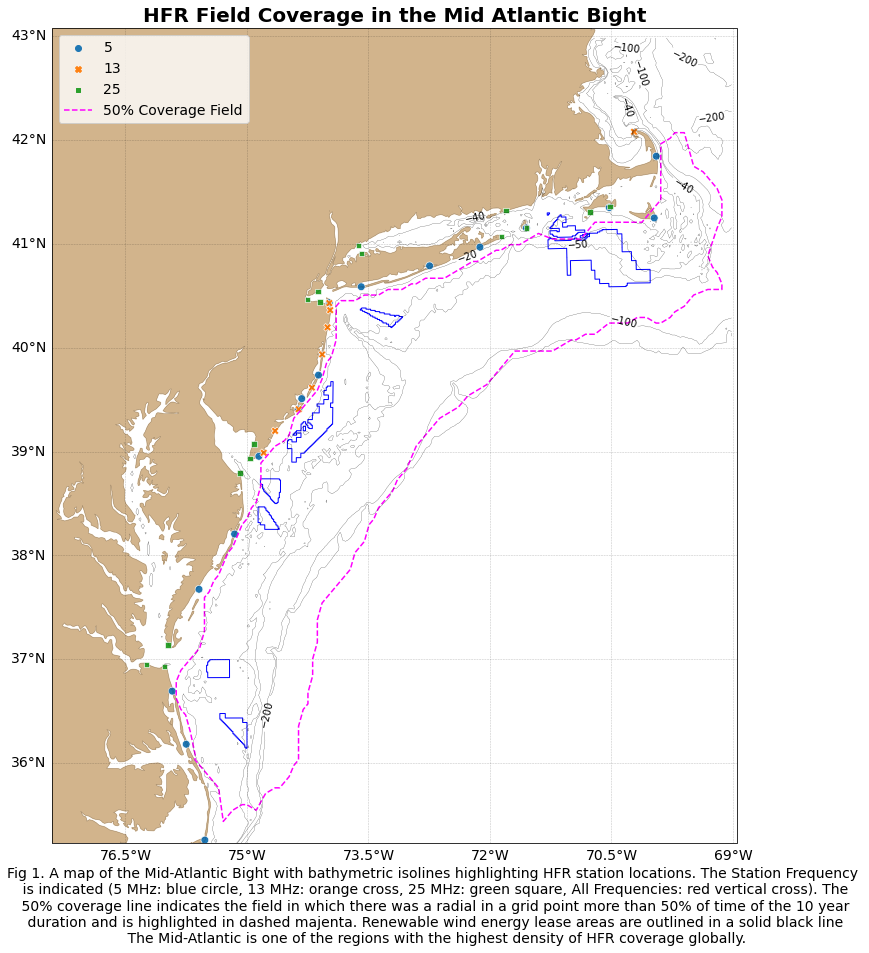

In [37]:
# Initialize blank plot with a mercator projection
lvls = [-200, -100, -50, -40, -20]
fig, ax = plt.subplots(
    figsize=(15, 15),
    subplot_kw=dict(projection=projection)
)

h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=60,ax=ax);
g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='fuchsia',label = '50% Coverage Field')
f=ax.contour(region.x, region.y, region.z, levels= lvls, colors='k', linestyles='solid', linewidths=.2,  transform=ccrs.PlateCarree())
plt.clabel(f)
k=lease_area.plot(ax=ax, color='none', edgecolor='blue', transform = projection, label = 'WEA')

plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(coast, linewidth=0.1, zorder=5)
ax.add_feature(borders, linewidth=1., zorder=5)
# ax.add_feature(lakes, linewidth=0.5, edgecolor='k', facecolor='none', zorder=5)
# ax.add_feature(states, linewidth=0.5, edgecolor='k', zorder=5)
# ax.add_feature(counties, edgecolor='gray', facecolor='none', linewidth=0.4, zorder=5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face',facecolor='tan'), zorder=0)
ax.set_title(f'HFR Field Coverage in the Mid Atlantic Bight', fontsize=20, fontweight='bold')
txt="Fig 1. A map of the Mid-Atlantic Bight with bathymetric isolines highlighting HFR station locations. The Station Frequency \n is indicated (5 MHz: blue circle, 13 MHz: orange cross, 25 MHz: green square, All Frequencies: red vertical cross). The \n 50% coverage line indicates the field in which there was a radial in a grid point more than 50% of time of the 10 year \n duration and is highlighted in dashed majenta. Renewable wind energy lease areas are outlined in a solid black line \n The Mid-Atlantic is one of the regions with the highest density of HFR coverage globally."
plt.figtext(0.55, 0.035, txt, wrap=True, horizontalalignment='center', fontsize=14)
ax.legend(fontsize=14,loc=2)
plt.savefig("Figure_1_tan.jpg")

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


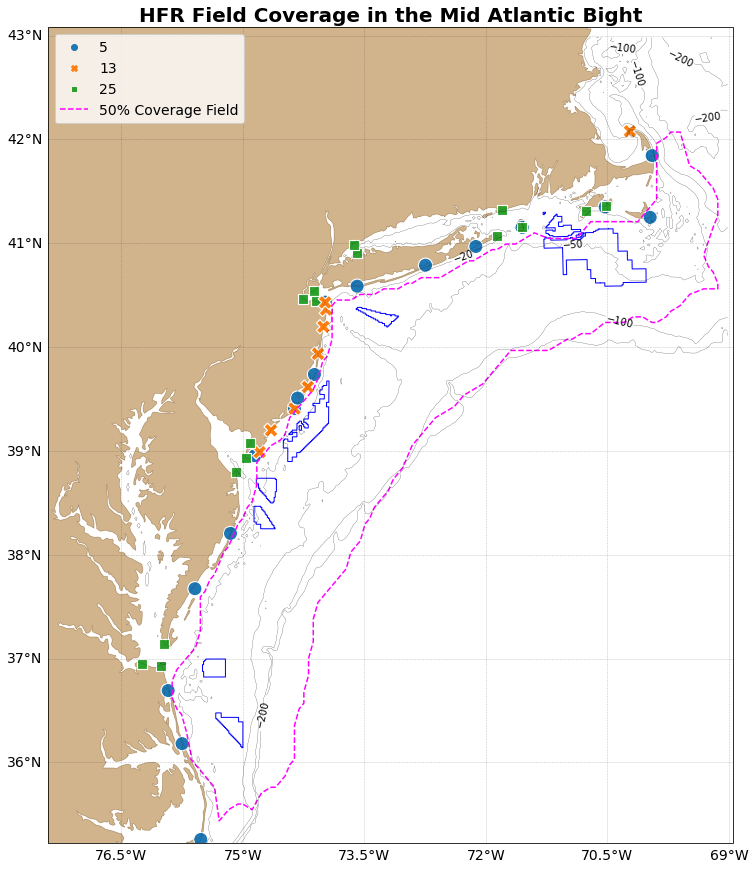

In [38]:
# Initialize blank plot with a mercator projection
lvls = [-200, -100, -50, -20]
fig, ax = plt.subplots(
    figsize=(15, 15),
    subplot_kw=dict(projection=projection)
)

h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=200,ax=ax);
plt.setp(h.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(h.get_legend().get_title(), fontsize='24') # for legend title
plt.legend(title='Station Frequency (MHz)',markerscale=3,title_fontsize=24,fontsize=20,loc='upper left')

g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='fuchsia',label = '50% Coverage Field')
f=ax.contour(region.x, region.y, region.z, levels= lvls, colors='k', linestyles='solid', linewidths=.2,  transform=ccrs.PlateCarree())
plt.clabel(f)
k=lease_area.plot(ax=ax, color='none', edgecolor='blue', transform = projection, label = 'WEA')

plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title


# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(coast, linewidth=0.1, zorder=5)
ax.add_feature(borders, linewidth=1., zorder=5)
# ax.add_feature(lakes, linewidth=0.5, edgecolor='k', facecolor='none', zorder=5)
# ax.add_feature(states, linewidth=0.5, edgecolor='k', zorder=5)
# ax.add_feature(counties, edgecolor='gray', facecolor='none', linewidth=0.4, zorder=5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face',facecolor='tan'), zorder=0)
ax.set_title(f'HFR Field Coverage in the Mid Atlantic Bight', fontsize=20, fontweight='bold')
# txt="Fig 1. A map of the Mid-Atlantic Bight with bathymetric isolines highlighting HFR station locations. The Station Frequency \n is indicated (5 MHz: blue circle, 13 MHz: orange cross, 25 MHz: green square, All Frequencies: red vertical cross). The \n 50% coverage line indicates the field in which there was a radial in a grid point more than 50% of time of the 10 year \n duration and is highlighted in dashed majenta. Renewable wind energy lease areas are outlined in a solid black line \n The Mid-Atlantic is one of the regions with the highest density of HFR coverage globally."
# plt.figtext(0.55, 0.035, txt, wrap=True, horizontalalignment='center', fontsize=14)
ax.legend(fontsize=14,loc=2)
# plt.show()
plt.savefig("Figure_1_tan_nocap.jpg")

C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Fishp\anaconda3\envs\Thesis\lib\site-packages\cartopy\mpl\gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


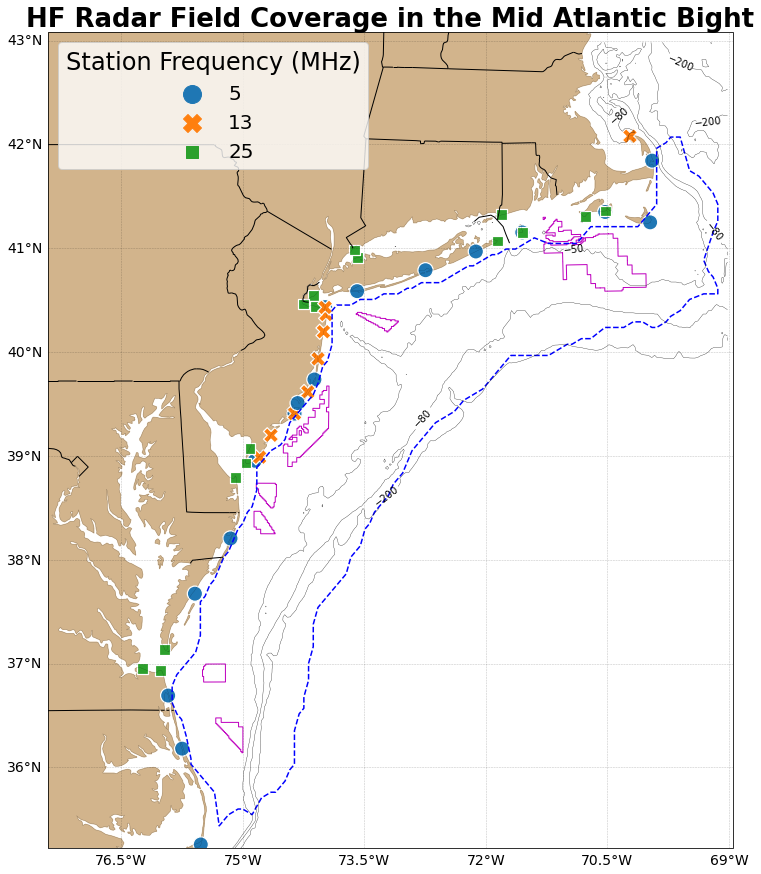

In [39]:
# Initialize blank plot with a mercator projection
lvls = [-200,-80,-50]
extent = [
    lon.min() - 1,
    lon.max() + 1,
    lat.min() + 0.465,
    lat.max() + 1
]
fig, ax = plt.subplots(
    figsize=(15, 15),
    subplot_kw=dict(projection=projection)
)
h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=230,ax=ax);
plt.setp(h.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(h.get_legend().get_title(), fontsize='24') # for legend title
plt.legend(title='Station Frequency (MHz)',markerscale=3,title_fontsize=24,fontsize=20,loc='upper left')

g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='blue',label = '50% Coverage Field')
f=ax.contour(region.x, region.y, region.z, levels= lvls, colors='k', linestyles='solid', linewidths=.3,  transform=ccrs.PlateCarree())
plt.clabel(f)
k=lease_area.plot(ax=ax, color='none', edgecolor='m', transform = projection, label = 'WEA')



# # for legend text
# plt.setp(gfg.get_legend().get_texts(), fontsize='10') 
 
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20') 
# plt.show()

# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(coast, linewidth=.1, zorder=5)
ax.add_feature(borders, linewidth=1., zorder=5)
# ax.add_feature(lakes, linewidth=0.5, edgecolor='k', facecolor='none', zorder=5)
ax.add_feature(states, linewidth=1, edgecolor='k', zorder=5)
# ax.add_feature(counties, edgecolor='gray', facecolor='none', linewidth=0.4, zorder=5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face',facecolor='tan'), zorder=0)
ax.set_title(f'HF Radar Field Coverage in the Mid Atlantic Bight', fontsize=26, fontweight='bold')
# txt="Fig 1. A map of the Mid-Atlantic Bight with bathymetric isolines highlighting HFR station locations. The Station Frequency \n is indicated (5 MHz: blue circle, 13 MHz: orange cross, 25 MHz: green square, All Frequencies: red vertical cross). The \n 50% coverage line indicates the field in which there was a radial in a grid point more than 50% of time of the 10 year \n duration and is highlighted in dashed majenta. Renewable wind energy lease areas are outlined in a solid black line \n The Mid-Atlantic is one of the regions with the highest density of HFR coverage globally."
# plt.figtext(0.55, 0.035, txt, wrap=True, horizontalalignment='center', fontsize=14)
# ax.legend(fontsize=14,loc=2)
# plt.show()
plt.savefig("Figure_1_tan_nocap.jpg",bbox_inches='tight')

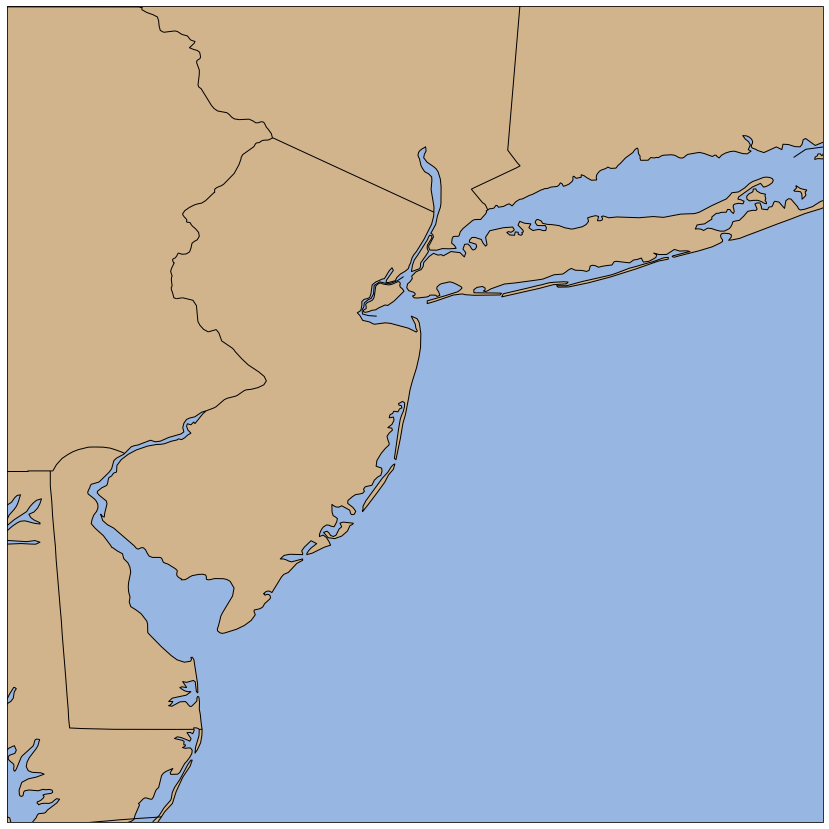

In [53]:
# Initialize blank plot with a mercator projection
lvls = [-200,-80,-50]
extent = [
    -76,
    -72,
     38,
     42
]
fig, ax = plt.subplots(
    figsize=(15, 15),
    subplot_kw=dict(projection=projection)
)

# h=sns.scatterplot(x=df4['lon'], y=df4['lat'],hue=df4['Frequency'],style=df4['Frequency'], data=df4,transform=projection, s=230,ax=ax);
# plt.setp(h.get_legend().get_texts(), fontsize='20') # for legend text
# plt.setp(h.get_legend().get_title(), fontsize='24') # for legend title
# plt.legend(title='Station Frequency (MHz)',markerscale=3,title_fontsize=24,fontsize=20,loc='upper left')

# g=ax.plot(dfr['lon'],dfr['lat'],transform=ccrs.PlateCarree(),ls='dashed',c='blue',label = '50% Coverage Field')
# f=ax.contour(region.x, region.y, region.z, levels= lvls, colors='k', linestyles='solid', linewidths=.3,  transform=ccrs.PlateCarree())
# plt.clabel(f)
# k=lease_area.plot(ax=ax, color='none', edgecolor='fuchsia', transform = projection, label = 'WEA')
#


# # for legend text
# plt.setp(gfg.get_legend().get_texts(), fontsize='10') 
 
# # for legend title
# plt.setp(gfg.get_legend().get_title(), fontsize='20') 
# plt.show()

# Gridlines and grid labels
# gl = ax.gridlines(
#     draw_labels=True,
#     linewidth=.5,
#     color='black',
#     alpha=0.25,
#     linestyle='--',
# )

gl.xlabels_top = gl.ylabels_right = False
gl.xlabels_bottom = gl.ylabels_left = False

# gl.xlabel_style = {'size': 14, 'color': 'black'}
# gl.ylabel_style = {'size': 14, 'color': 'black'}

# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(coast, linewidth=1, zorder=5)
ax.add_feature(borders, linewidth=1., zorder=5)
ax.add_feature(cfeature.OCEAN)
# ax.add_feature(lakes, linewidth=0.5, edgecolor='k', facecolor='none', zorder=5)
ax.add_feature(states, linewidth=1, edgecolor='k', zorder=5)
# ax.stock_img()
cfeature.NaturalEarthFeature('physical', 'ocean', '50m')
# ax.add_feature(counties, edgecolor='gray', facecolor='none', linewidth=0.4, zorder=5)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face',facecolor='tan'), zorder=0)
# ax.set_title(f'HFR Field Coverage in the Mid Atlantic Bight', fontsize=26, fontweight='bold')
# txt="Fig 1. A map of the Mid-Atlantic Bight with bathymetric isolines highlighting HFR station locations. The Station Frequency \n is indicated (5 MHz: blue circle, 13 MHz: orange cross, 25 MHz: green square, All Frequencies: red vertical cross). The \n 50% coverage line indicates the field in which there was a radial in a grid point more than 50% of time of the 10 year \n duration and is highlighted in dashed majenta. Renewable wind energy lease areas are outlined in a solid black line \n The Mid-Atlantic is one of the regions with the highest density of HFR coverage globally."
# plt.figtext(0.55, 0.035, txt, wrap=True, horizontalalignment='center', fontsize=14)
# ax.legend(fontsize=14,loc=2)
# plt.show()
# plt.savefig("Figure_1_tan_nocap_zoom.jpg",bbox_inches='tight')